# Principle component analysis

### We now move to the predictive part of our project. Using PCA we can reduce the 10 topic distribution to one dimension and train it on our success target.

- Get successful urls from success_urls (articles that coverted users)
- Create target (1 = coverted a user, 0 = did not convert a user)
- Run PCA on article topic distributions and create scatter plot of distribution (define target by colours)
- Correlations and conclusions?

## 1. List of successful urls

In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
with open('../04_Data/success_g13.pkl', 'rb') as file:
    success_urls = pickle.load(file)

In [ ]:
success_urls

In [ ]:
succ_urls = list(set(success_urls['url'].to_list()))

## 2. Create target column

In [ ]:
with open('../04_Data/lda_separated_posts.pkl', 'rb') as file:
    academy_posts = pickle.load(file)


In [ ]:
academy_posts['target'] = np.where(academy_posts.url.isin(succ_urls), 'success', 'fail')

In [ ]:
academy_posts.loc[academy_posts['target'] == 'success']

In [ ]:
academy_features = academy_posts[academy_posts.columns[-11:-1]].values
academy_features

## 3. Run PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X = academy_features

In [ ]:
# Reducing 10 dimensional to 2 dimensions

pca_topics = PCA(n_components=2)
pca_topic_dist = pca_topics.fit_transform(X)

In [ ]:
# quite a bit of loss (approx. 39%)

pca_topics.explained_variance_ratio_

In [ ]:
pca_topics_df = pd.DataFrame(data=pca_topic_dist, columns=['pc1', 'pc2'])
pca_topics_df.head(10)

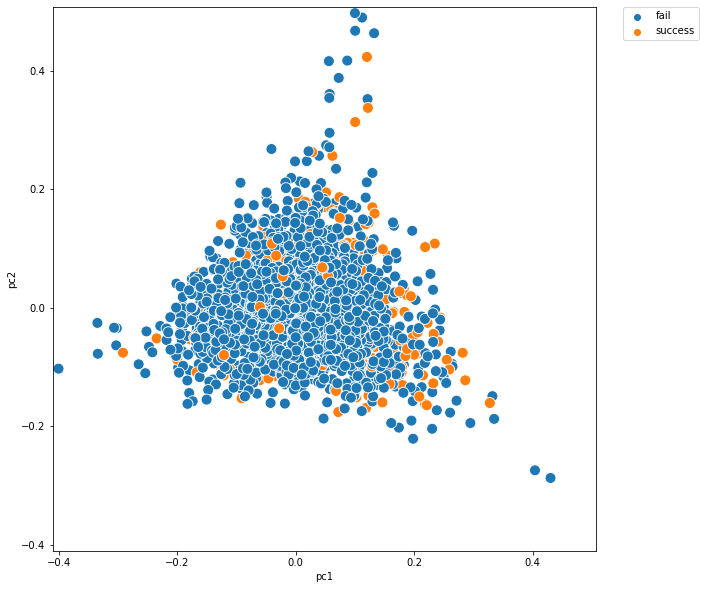

In [20]:
pca_topics_df2 = pd.DataFrame({'pc1':pca_topic_dist[:,0], 'pc2':pca_topic_dist[:,1], 'label':academy_posts['target']})
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='pc1', y='pc2', hue='label', data=pca_topics_df2, ax=ax, s=120)
lim = (pca_topic_dist.min()-0.01, pca_topic_dist.max()+0.01)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## 4. Using t-SNE (t-distributed Stochastic Neighbor Embedding)

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
X2 = academy_features
y2 = academy_posts.index.values


In [ ]:
X2.shape, y2.shape


In [ ]:
tsne = TSNE(n_components=2, perplexity=10, learning_rate=500)
tsne_topics = tsne.fit_transform(X2)


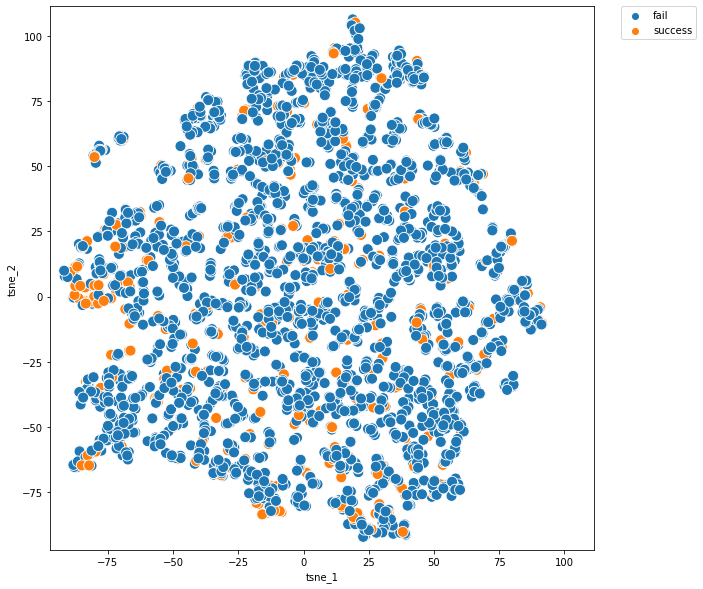

In [21]:
tsne_topics_df = pd.DataFrame({'tsne_1':tsne_topics[:,0], 'tsne_2':tsne_topics[:,1], 'label':academy_posts['target']})
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_topics_df, ax=ax,s=120)
lim = (tsne_topics.min()-5, tsne_topics.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
